In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
plt.rcParams['font.family'] = 'Malgun Gothic'  # 폰트 적용 (한글 깨짐 방지)
plt.rcParams['font.size'] = 14                 # 폰트 크기
plt.rcParams['figure.figsize'] = (16, 10)       # figsize 를 전역으로 설정
plt.rcParams['axes.unicode_minus'] = False     # -(마이너스) 표기 가능하도록 함

In [2]:
data = pd.read_csv('SegaGames.csv')
data

,meta_score,title,platform,date,user_score,link,esrb_rating,developers,genres
0,NaN,Persona 3 Reload,XONE,"Feb 2, 2024",NaN,/game/xbox-one/persona-3-reload,NaN,['P-Studio'],"['Role-Playing', 'Japanese-Style']"
1,NaN,Persona 5 Tactica,PC,"Nov 17, 2023",NaN,/game/pc/persona-5-tactica,NaN,['P-Studio'],"['Strategy', 'Turn-Based', 'Tactics']"
2,NaN,Persona 5 Tactica,XONE,"Nov 17, 2023",NaN,/game/xbox-one/persona-5-tactica,RP,['P-Studio'],"['Strategy', 'Turn-Based', 'Tactics']"
3,NaN,Persona 5 Tactica,PS4,"Nov 17, 2023",NaN,/game/playstation-4/persona-5-tactica,NaN,['P-Studio'],"['Strategy', 'Turn-Based', 'Tactics']"
4,NaN,Persona 5 Tactica,Switch,"Nov 17, 2023",NaN,/game/switch/persona-5-tactica,RP,['P-Studio'],"['Strategy', 'Turn-Based', 'Tactics']"
...,...,...,...,...,...,...,...,...,...
1476,NaN,Samba de Amigo: Party Central,PC,Q4 2023,NaN,/game/pc/samba-de-amigo-party-central,NaN,['Sega'],"['Action', 'Rhythm', 'Music']"
1477,NaN,Like a Dragon: Infinite Wealth,PC,TBA 2024,NaN,/game/pc/like-a-dragon-infinite-wealth,NaN,['Ryu ga Gotoku Studios'],"['Action Adventure', 'General']"
1478,NaN,Like a Dragon: Infinite Wealth,PS4,TBA 2024,NaN,/game/playstation-4/like-a-dragon-infinite-wealth,NaN,['Ryu ga Gotoku Studios'],"['Action Adventure', 'General']"
1479,NaN,Like a Dragon: Infinite Wealth,XONE,TBA 2024,NaN,/game/xbox-one/like-a-dragon-infinite-wealth,NaN,['Ryu ga Gotoku Studios'],"['Action Adventure', 'General']"


# EDA

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481 entries, 0 to 1480
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   meta_score   788 non-null    float64
 1   title        1481 non-null   object 
 2   platform     1481 non-null   object 
 3   date         1481 non-null   object 
 4   user_score   929 non-null    float64
 5   link         1481 non-null   object 
 6   esrb_rating  1120 non-null   object 
 7   developers   1471 non-null   object 
 8   genres       1479 non-null   object 
dtypes: float64(2), object(7)
memory usage: 104.3+ KB


#### 위키백과
오락 소프트웨어 등급 위원회

##### EC - Early Childhood
이 콘텐츠는 3세 이상이 사용 가능하며, 주로 교육용으로 사용된다. MPAA의 "G" 또는 "TV-Y"에 해당된다. 게임물관리위원회의 "전체 이용가"(주로 유아 교육용 게임)에 해당된다. 현재는 e등급에 포함되면서 폐지되었다.
E - Everyone (1997년 이전에는 K-A - Kids to Adults)
이 콘텐츠는 연령에 관계없이 적합한 등급이다. 환상적인 매체나, 약간의 만화관련 매체가 포함된다. MPAA의 "G"/"PG" 또는 미국 TV 등급 제도의 "TV-Y7"/"TV-G"에 해당, 게임물등급위원회의 "전체 이용가"(주로 가족 게임 및 캐주얼 게임)에 해당된다.
##### E10+ - Everyone 10+
이 콘텐츠는 10세 이상에게 적합하며, 환상적인 매체나, 약간 많은 만화관련 매체, 약간의 폭력, 약간의 부적절 언어가 포함된다. MPAA의 "PG" 또는 미국 TV 등급 제도의 "TV-PG"에 해당된다. "E10+"는 2005년 3월 2일에 추가되었다. 게임물등급위원회의 "전체 이용가", "12세 이용가"에 해당된다.
##### T - Teen
이 콘텐츠는 13세 이상에게 적합하며, 약간의 공포나, 중간의 폭력, 선정적 표현, 재산상 이익이나 손실이 없는 카지노식 도박, 심한 부적절 언어가 포함된다. MPAA의 "PG-13" 또는 미국 TV 등급 제도의 "TV-14"에 해당, 게임물등급위원회의 "12세 이용가", "15세 이용가"에 해당된다.
##### M - Mature 17+
이 콘텐츠는 17세 이상에게 적합하며, 일반적인 성인용 게임이다. 심한 성적 내용, 재산상 이익이나 손실이 없는 카지노식 도박, 심한 폭력과 심한 부적절 언어가 포함된다. MPAA의 "R" 또는 미국 TV 등급 제도의 "TV-MA"에 해당, 게임물등급위원회의 "청소년 이용불가"에 해당된다. 여기까지는 (헌법상으로는) 미성년자가 자유롭게 구매할 수 있는 등급이다. 다만 대부분의 소매점에는 자체 규제를 거는 경우가 많아 실질적으로는 미성년자에게 판매가 제한되어 있다.
##### AO - Adults Only 18+
이 콘텐츠는 수위가 매우 높아, 미성년자에게는 판매할 수 없는 등급이다. 극심한 성적 내용과 폭력이 포함된다. MPAA의 "NC-17" 또는 미국 TV 등급 제도의 "TV-MA"에 해당, 게임물등급위원회의 "등급분류거부"에 해당된다. PC 게임에만 사용되는 등급 제도이다. 참고로 이 등급을 받게 되면 게임 출시가 개방적으로 안되며 광고 조차도 할 수 없다. 미성년자에게 판매할 시 법적 처벌을 받는다.
##### RP - Rating Pending
이 콘텐츠는 최종 등급 미정이며, 시험판 전용으로 사용된다.

In [154]:
data['meta_score'].value_counts()

80.0    37
81.0    33
83.0    32
84.0    30
82.0    28
        ..
95.0     1
26.0     1
35.0     1
28.0     1
97.0     1
Name: meta_score, Length: 64, dtype: int64

In [4]:
data['title'].value_counts()

Sonic the Hedgehog                      8
The Golden Compass                      7
Sonic & All-Stars Racing Transformed    7
Iron Man                                7
Thor: God of Thunder                    7
                                       ..
3D Ecco the Dolphin                     1
3D Galaxy Force II                      1
Total War: Rome II - Caesar in Gaul     1
3D Sonic the Hedgehog                   1
Samba de Amigo: Party-To-Go             1
Name: title, Length: 875, dtype: int64

In [5]:
data['platform'].value_counts()

PC                       426
iOS                      125
PS3                      114
X360                     114
WII                      111
PS4                      100
Switch                    86
XONE                      80
PS2                       63
XBOX                      42
DC                        37
DS                        35
3DS                       33
PSP                       31
GC                        30
GBA                       12
VITA                      12
Genesis)                   8
Master System)             5
WIIU                       4
Arcade)                    3
2004)                      2
Dreamcast Collection)      2
Creative Assembly)         1
Live Arcade)               1
2011)                      1
PSN)                       1
2013)                      1
1995)                      1
Name: platform, dtype: int64

In [6]:
data['date'].value_counts()

Canceled        20
Sep 25, 2018    16
TBA             15
Jun 1, 2010     15
Sep 13, 2010    14
                ..
Nov 7, 2012      1
Nov 1, 2012      1
Oct 18, 2012     1
Oct 17, 2012     1
August 2023      1
Name: date, Length: 867, dtype: int64

In [13]:
data['user_score'].value_counts()

8.2    51
8.1    51
7.8    46
8.3    44
8.5    43
       ..
4.4     1
2.9     1
9.4     1
9.0     1
2.4     1
Name: user_score, Length: 67, dtype: int64

In [8]:
data['link'].value_counts()

/game/ios/sonic-at-the-olympic-games             2
/game/pc/sega-mega-drive-and-genesis-classics    2
/game/pc/sonic-generations                       2
/game/wii/enduro-racer                           1
/game/playstation-3/stormrise                    1
                                                ..
/game/xbox-one/alien-isolation---safe-haven      1
/game/pc/alien-isolation---safe-haven            1
/game/3ds/3d-after-burner-ii                     1
/game/xbox-one/alien-isolation---lost-contact    1
/game/ios/samba-de-amigo-party-to-go             1
Name: link, Length: 1478, dtype: int64

In [9]:
data['esrb_rating'].value_counts().sort_index()

E       454
E10+    180
EC        1
K-A      13
M       194
RP        3
T       275
Name: esrb_rating, dtype: int64

In [10]:
data['developers'].value_counts()

['Sega']                               417
['Creative Assembly']                  149
['Sonic Team']                          89
['Ryu ga Gotoku Studios']               48
['Sports Interactive']                  46
                                      ... 
['Compile']                              1
['CRI']                                  1
['PlatinumGames', ' Bitbaboon']          1
['Collision Studios']                    1
['Gearbox Software', ' WayForward']      1
Name: developers, Length: 217, dtype: int64

In [11]:
data['genres'].value_counts()

['Action', 'Platformer', 'Platformer', '2D', '2D']                                            57
['Action', 'Platformer', '2D']                                                                55
['Miscellaneous', 'Compilation']                                                              53
['Strategy', 'Turn-Based', 'Tactics']                                                         41
['Strategy', 'Real-Time', 'General']                                                          38
                                                                                              ..
['Role-Playing', 'Console-style RPG', 'Console-style RPG', 'Roguelike']                        1
['Action', 'General', 'Shooter', 'Rail']                                                       1
['Action', 'Miscellaneous', 'Puzzle', 'Puzzle', 'General', 'Puzzle', 'Pinball', 'General']     1
['Action', 'Shooter', 'Shooter', 'Scrolling', 'Scrolling', "Shoot-'Em-Up", 'Vertical']         1
['Strategy', 'Adventure', 'Tur

In [16]:
data.describe()

,meta_score,user_score
count,788.000000,929.000000
mean,72.230964,7.324112
std,12.456173,1.202780
min,26.000000,1.700000
25%,65.000000,6.700000
50%,74.000000,7.600000
75%,82.000000,8.200000
max,97.000000,9.600000


### Meta scores distribution

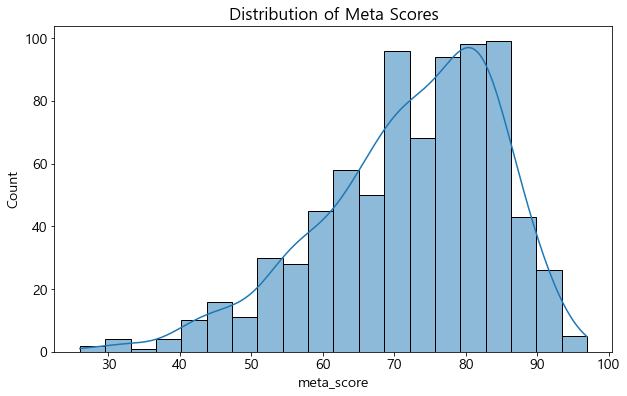

In [36]:
# Data Visualization
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='meta_score', bins=20, kde=True)
plt.title('Distribution of Meta Scores')
plt.show()

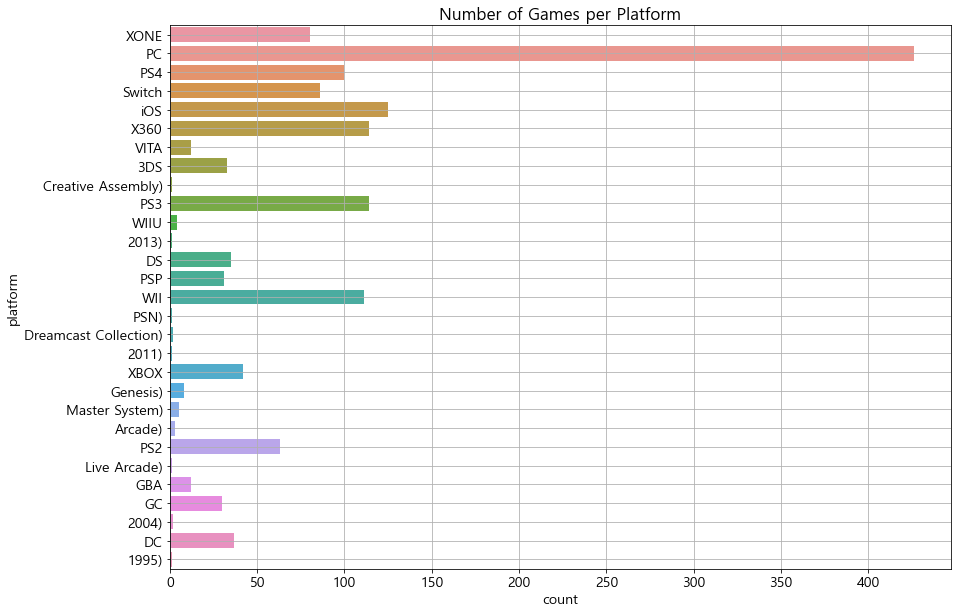

In [34]:
plt.figure(figsize=(14, 10))
sns.countplot(data=data, y='platform')
plt.title('Number of Games per Platform')
plt.grid()
plt.show()

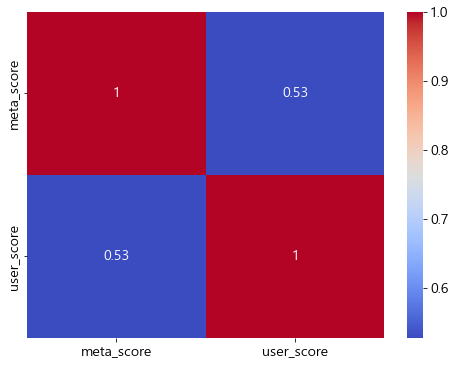

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(data[['meta_score', 'user_score']].corr(),
            annot=True, cmap='coolwarm')
plt.show()

In [201]:
lst = [1,2,3]
lst2 = []
for i in range(len(lst)):
    lst2.append('hi')
pd.DataFrame([lst2, lst]).T

# a = pd.DataFrame()
# a['0'] = ['hi',3]
# a['1'] = ['hi',3]
# a['2'] = ['hi',3]
# a.T

,0,1
0,hi,1
1,hi,2
2,hi,3


In [226]:
# 장르별 meta_score 평균
data2 = data[data['genres'].notnull()]

genres = set()
for genre in data2['genres'].unique():
    genres.update(eval(genre))
genres = pd.DataFrame(genres, columns=['genres'])

genre_df = pd.DataFrame()
for genre in genres['genres']:
    temp = data2.loc[data2['genres'].str.contains(genre, regex=False), 'meta_score']
    temp = temp.dropna()
    lst = [genre for _ in range(len(temp))]
    temp = pd.DataFrame([lst, temp]).T
    genre_df = pd.concat([genre_df, temp])
genre_df = genre_df.reset_index(drop=True)
genre_df.columns = ['genre', 'meta_score']
genre_df


,genre,meta_score
0,Party,76.0
1,Party,63.0
2,Party,62.0
3,Party,70.0
4,Party,70.0
...,...,...
2928,Historic,88.0
2929,Historic,79.0
2930,Historic,74.0
2931,Historic,82.0


In [238]:
genre_df = genre_df.groupby('genre').mean().round(1).reset_index()
for idx in range(len(genre_df)):
    print(genre_df.iloc[idx, 0])

2D
3D
4X
Action
Action Adventure
Action RPG
Adventure
Alternative
Arcade
Artillery
Athletics
Automobile
Baseball
Basketball
Beat-'Em-Up
Billiards
Board / Card Game
Board Games
Breeding/Constructing
Business / Tycoon
Car Combat
Card Battle
Career
Combat
Compilation
Console-style RPG
Dancing
Driving
Edutainment
Fantasy
Fighting
First-Person
Fishing
Flight
Football
Futuristic
GT / Street
Gambling
General
Historic
Horizontal
Horror
Ice Hockey
Individual
Japanese-Style
Kart
Large Spaceship
Light Gun
Linear
Logic
MOBA
Management
Massively Multiplayer
Massively Multiplayer Online
Matching
Mech
Metroidvania
Miscellaneous
Mission-based
Modern
Modern Jet
Music
Nature
Olympic Sports
On-foot
Open-World
Other
Parlor
Party
Party / Minigame
Pinball
Platformer
Point-and-Click
Puzzle
Racing
Rail
Rally / Offroad
Real-Time
Rhythm
Roguelike
Role-Playing
Sci-Fi
Scrolling
Shoot-'Em-Up
Shooter
Sim
Simulation
Soccer
Sports
Stacking
Strategy
Street
Survival
Tactical
Tactics
Team
Tennis
Third-Person
Top-Down
Tr

<AxesSubplot:xlabel='genre', ylabel='meta_score'>

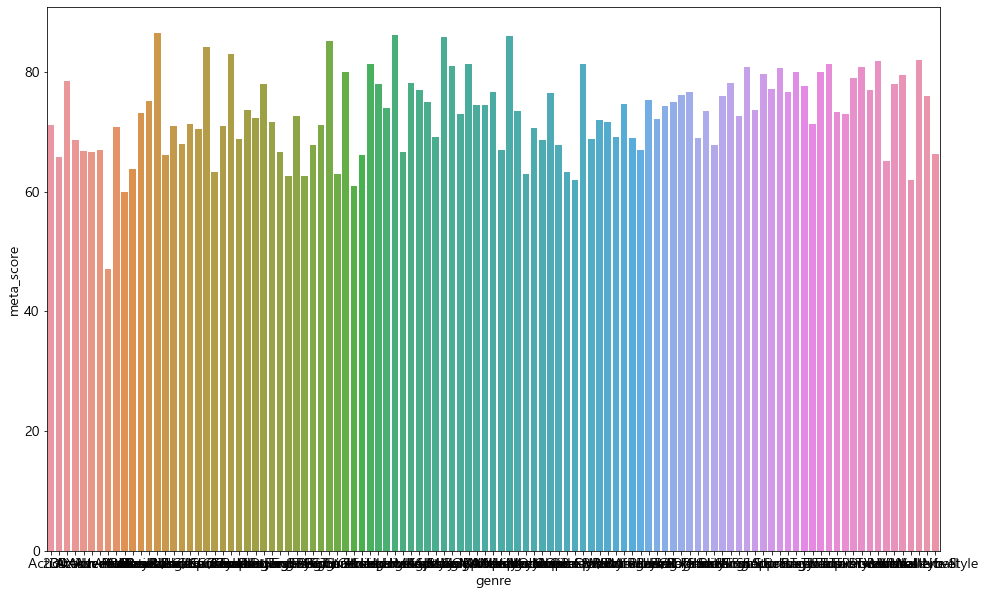

In [233]:
sns.barplot(genre_df, x='genre', y='meta_score')

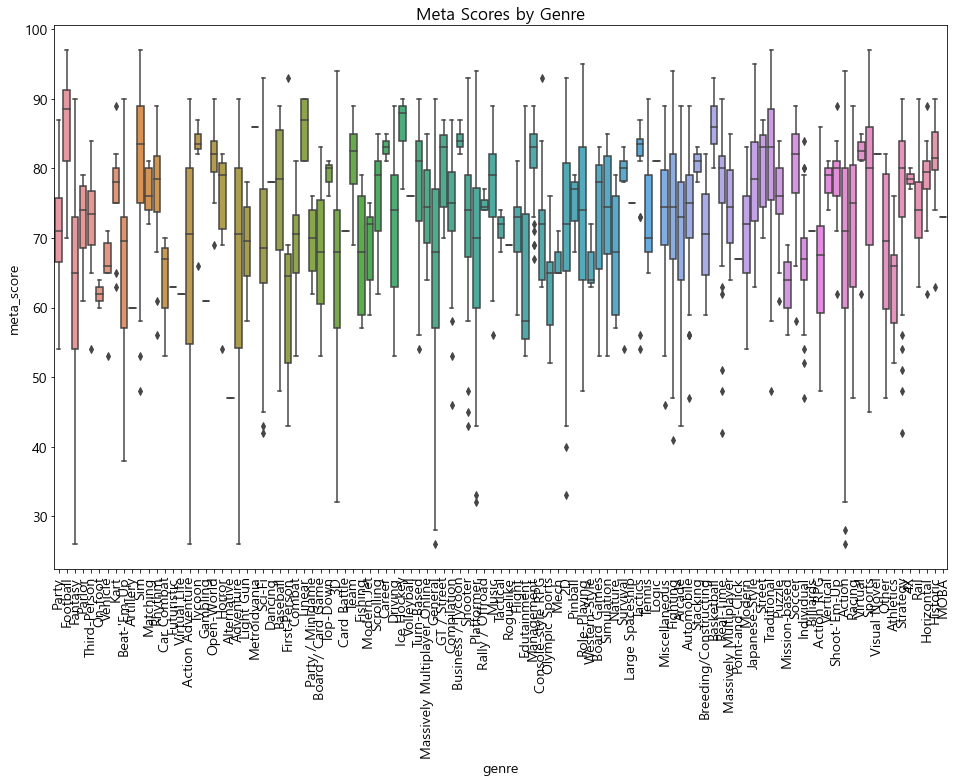

In [224]:
plt.figure(figsize=(16, 10))
sns.boxplot(genre_df, x='genre', y='meta_score')
plt.title('Meta Scores by Genre')
plt.xticks(rotation=90)
plt.show()

C:\Users\dwook\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\dwook\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
C:\Users\dwook\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\dwook\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
C:\Users\dwook\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\dwook\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
C:\Users\dwook\anaconda3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empt

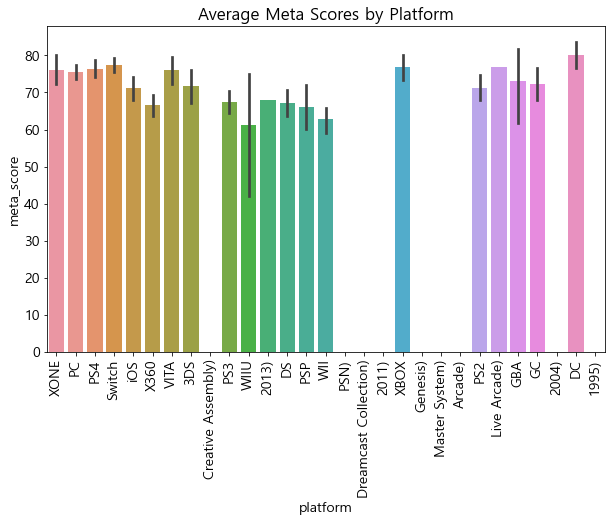

In [242]:
plt.figure(figsize=(10, 6))
sns.barplot(data, x='platform', y='meta_score')
plt.title('Average Meta Scores by Platform')
plt.xticks(rotation=90)
plt.show()


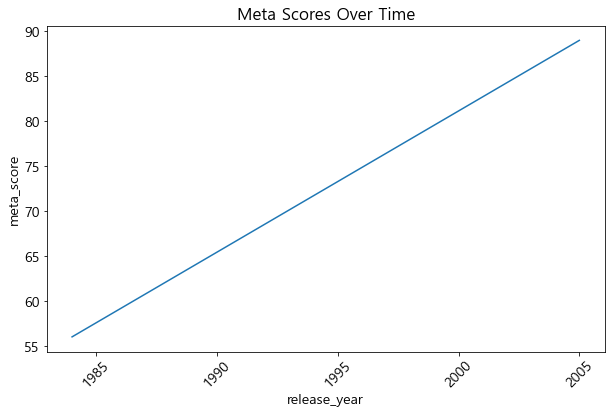

In [244]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
# data = pd.read_csv('/kaggle/input/sega-games/SegaGames.csv')  # Replace with the actual file path


# Remove rows with "TBA" release dates
data = data[data['date'] != 'TBA']

# Remove rows with non-standard values in the 'date' column
data = data[data['date'].str.contains(r'^\d{4}', na=False)]

# Convert the 'date' column to datetime and extract the year
data['date'] = pd.to_datetime(data['date'])
data['release_year'] = data['date'].dt.year

# Release Date Analysis
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='release_year', y='meta_score')
plt.title('Meta Scores Over Time')
plt.xticks(rotation=45)
plt.show()

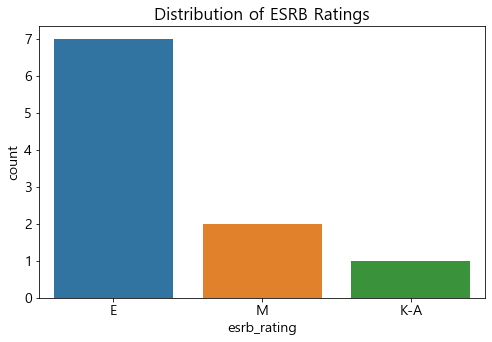

In [245]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='esrb_rating')
plt.title('Distribution of ESRB Ratings')
plt.show()

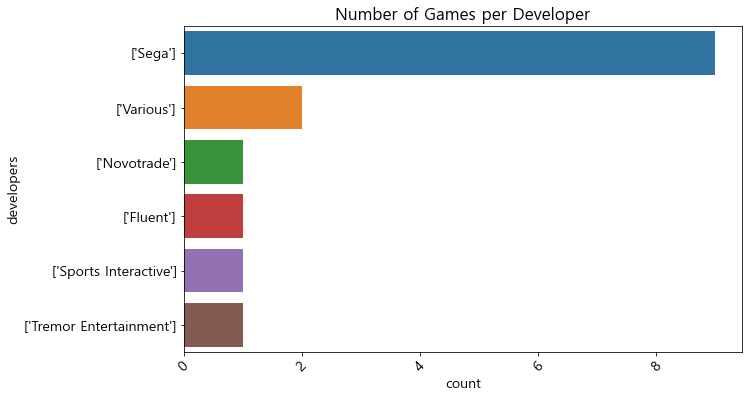

In [246]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='developers', order=data['developers'].value_counts().index)
plt.title('Number of Games per Developer')
plt.xticks(rotation=45)
plt.show()

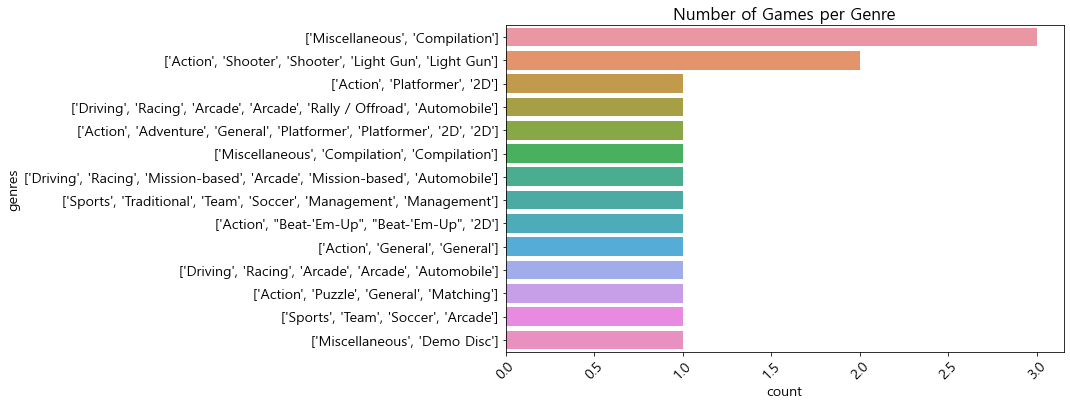

In [248]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='genres', order=data['genres'].value_counts().index)
plt.title('Number of Games per Genre')
plt.xticks(rotation=45)
plt.show()